In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(np.random.randn(5,3),
                columns=['c1','c2','c3'])  #5행3열의 난수 발생
df
df.iloc[0,0] = None #np.nan
df

,c1,c2,c3
0,NaN,-1.664565,1.258943
1,1.503723,0.972318,0.631922
2,1.055574,-0.944618,0.060752
3,-0.256559,0.071092,-0.183709
4,1.227573,-0.377581,-0.112560


In [8]:
df.loc[1,['c1','c3']] = np.NaN
df
df.loc[2,['c2']] = None
df.loc[3,['c2']] = None
df.loc[4,['c3']] = None
df

,c1,c2,c3
0,NaN,-1.664565,1.258943
1,NaN,0.972318,NaN
2,1.055574,NaN,0.060752
3,-0.256559,NaN,-0.183709
4,1.227573,-0.377581,NaN


In [11]:
#NaN이 들어가 있는 자리를 모두 0으로 대체
df.fillna(0)
df.fillna(method='ffill')

,c1,c2,c3
0,NaN,-1.664565,1.258943
1,NaN,0.972318,1.258943
2,1.055574,0.972318,0.060752
3,-0.256559,0.972318,-0.183709
4,1.227573,-0.377581,-0.183709


In [29]:
df.fillna(df.mean()) #NaN을 평균값으로 대체
df.where(pd.notnull(df),df.mean(), axis='columns')  #null이 아닌 데이터에 대해 평균을 구하기
                                                    #df.where(조건,실행)->조건이 거짓일때 실행

df.fillna(df.mean()['c1']) #NaN에 'c1'의 평균값으로 대체

,c1,c2,c3
0,0.675529,-1.664565,1.258943
1,0.675529,0.972318,0.675529
2,1.055574,0.675529,0.060752
3,-0.256559,0.675529,-0.183709
4,1.227573,-0.377581,0.675529


In [26]:
arr = np.array([1,2,3,10,20,30,0.1,0.2])
np.min(arr)  #최솟값 출력
np.argmin(arr)  #최솟값이 있는 위치의 인덱스
np.max(arr)
np.argmax(arr)
np.where(arr<1)  #where함수는 조건문 사용 -> 출력값: 인덱스
np.where(arr>=10,0,arr)
#np.where(조건,참,거짓) =>  참->0으로 대체, 거짓->arr 그대로 출력
np.where(arr>=10,arr*0.1,arr)

array([1. , 2. , 3. , 1. , 2. , 3. , 0.1, 0.2])

In [34]:
df.fillna(df.mean()['c1':'c2'])

,c1,c2,c3
0,0.675529,-1.664565,1.258943
1,0.675529,0.972318,NaN
2,1.055574,-0.356610,0.060752
3,-0.256559,-0.356610,-0.183709
4,1.227573,-0.377581,NaN


In [43]:
import warnings
warnings.filterwarnings(action='ignore')

In [58]:
df = pd.DataFrame({'c1':[1,2,3,4,5],
              'c2':[6,7,8,9,10]})
df.loc[[1,3],['c2']] = np.nan  
df
#c2p열에는 c2열 값이 notnull이면 c2열 값을,
# c2열 값이 null이면 c1열 값으로 채우고자 함
# df['c2p'] = np.where(조건,참,거짓)
df['c2p'] = np.where(pd.notnull(df['c2'])==True, df['c2'],df['c1'])
df

#반복문으로 변경
for i in df.index:
    if pd.notnull(df.ix[i,'c2'])==True:
        df.loc[i,'c2p'] = df.ix[i,'c2']
    else:
        df.loc[i,'c2p'] = df.ix[i,'c1']
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [59]:
#dropna 메서드: 열(axis=1)/행(axis=0) 제거

df = pd.DataFrame({'c1':[1,2,3,4,5],
              'c2':[6,7,8,9,10]})
df.loc[[1,3],['c2']] = np.nan  
df

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [64]:
df.dropna(axis=0)  #결측값이 있는 행 전체 제거
df.dropna(axis=1)  #결측값이 있는 열 전체 제거
df[['c1','c2']].dropna()  #df.dropna(axis=0)
#axis=0 default

,c1,c2
0,1,6.0
2,3,8.0
4,5,10.0


In [73]:
#결측값 보간(interpolate)
"""
1.시계열 데이터에 대해 선형적으로 비례하는 값
0
2
4
na -> 6
8
2.이미지 보간: 그라데이션과 비슷
"""
from datetime import datetime
#datetime모듈에 있는 datetime함수를 가져옴
dateStr = ['1/13/2020','1/16/2020','1/17/2020','1/20/2020']
dates = pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [75]:
ts = pd.Series([1,np.nan,np.nan,10], index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [76]:
tslr = ts.interpolate() #method=values : 선형적으로 비례하게 결측값을 보간
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [78]:
tsTime = ts.interpolate(method='time', limit=1) #limit: 보간하고자 하는 결측값의 수
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

In [ ]:
#na를 대체: fillna, replace
#fillna: na를 다른 값으로 대체
#replace: na뿐만 아니라 다른 모든 값에 대해서도 대체 가능
#결측값/실측값 대상 데이터 교체

In [87]:
s = pd.Series([1,2,3,4,np.nan])
s
#replace: 결측값/실측값 변경
s.replace(3,9)  #3->9
s.replace(np.NaN,5) #nan->5
s.replace([1,2,3],[6,7,8]) #1,2,3->6,7,8

s = pd.Series([1,2,3,1,np.nan])
s.replace([1,2,3],[6,7,8]) #일대일 대응
s.replace([1,2,3,np.nan],[10,20,30,99])

0    10.0
1    20.0
2    30.0
3    10.0
4    99.0
dtype: float64

In [90]:
s
s.replace({1:5,3:30,np.NaN:99}) #{원래값:변경값}

0     5.0
1     2.0
2    30.0
3     5.0
4    99.0
dtype: float64

In [102]:
#데이터프레임에서 replace 적용
df = pd.DataFrame({'c1':['aaa','b','c','d'],
                 'c2':[1,2,3,4],
                 'c3':[5,6,7,np.nan]})
df.replace({'c1':'aaa'},{'c1':'bbb'})
df.replace({'c3':'np.NaN'},{'c3':99})

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [ ]:
#병합: 중복 데이터 발생
#중복데이터 여부: duplicated()
#중복데이터 처리: drop_duplicates() 한 개만 남겨놓고 나머지는 제거

In [104]:
df = pd.DataFrame({'k1':['a','b','b','c','c'],
                   'k2':['x','y','y','x','z'],
                   'col':[10,20,30,40,50]})
df

,k1,k2,col
0,a,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [107]:
df.duplicated(['k1'])
df.duplicated(['k2'])
df.duplicated(['k1','k2'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [112]:
df.duplicated(['k1'], keep='first') #keep='first' default
df.duplicated(['k1'], keep='last')
df.duplicated(['k1'], keep=False) #중복은 모두 True

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [116]:
df = pd.DataFrame({'k1':['b','b','b','c','c'],
                   'k2':['x','y','y','x','z'],
                  'col':[10,20,30,40,50]})
df

,k1,k2,col
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [118]:
df.duplicated(['k1'], keep='first') #keep='first' : default
df.duplicated(['k1'], keep='last')
df.duplicated(['k1'], keep=False) #중복은 모두 True

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [119]:
df

,k1,k2,col
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [122]:
#중복값 제거(1개만 살리고 나머지 중복은 제거)
df.drop_duplicates(['k1']) #keep='first' : default
df.drop_duplicates(['k1'], keep='last')
df.drop_duplicates(['k1'], keep=False) #중복값 모두 제거

,k1,k2,col


In [ ]:
#유일한 값: unique()
#유일한 값 개수 세기: value_counts()

In [123]:
df = pd.DataFrame({'a':['a1','a1','a2','a2','a3'],
              'b':['b1','b1','b2','b2',np.nan],
              'c':[1,1,3,4,4]})
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [127]:
df['a'].unique()
#help(pd.Series.unique)
df['b'].unique()
df['c'].unique()

array([1, 3, 4], dtype=int64)

In [136]:
#유일값 개수 세기
#help(pd.Series.value_counts)
#normalize=디폴트(False): 개수, True:상대비율
df['a'].value_counts(normalize=False)
#normalize=False :디폴트
df['a'].value_counts(normalize=True) #비율

#sort=True : 개수 기준 정렬, False: 유일값 개수 기준 정렬
df['a'].value_counts(normalize=False, sort=True, 
                                       ascending=True)  #ascending=True : 오름차순 정렬

a3    1
a1    2
a2    2
Name: a, dtype: int64

In [140]:
df['c'].value_counts(sort=True, ascending=False)
#default: sort=True, ascending=False
#유일한 값의 개수를 기준으로 내림차순

df['c'].value_counts(sort=True, ascending=True)
#유일한 값의 개수를 기준으로 오름차순
df['c'].value_counts(sort=False)
#정렬 기준이 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [141]:
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [150]:
df['b'].value_counts()
#default : dropna=True =>nan을 제외한 나머지에 대해서 value_counts
df['b'].value_counts(dropna=False)

df['c'] #1 1 3 4 4
#group별 데이터 개수 세기
df['c'].value_counts(bins=[0,1,2,3,4,5],sort=False)
#( ) : 개구간, [ ] : 폐구간

#동일한 결과를 도출하는 코드
res = pd.cut(df['c'],bins=[0,1,2,3,4,5])
pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

In [ ]:
#변수들 간 척도가 다른 경우: 데이터 표준화 (ex.토익과 토플 점수의 비교)
#모집단:전체 집단,  
#모집단에서 표본 추출->표본 집단 평균, 표준편차.. -> 통계량 => 모평균, 모분산(모수, parameter) 추정

"""
모수적방법
중심극한정리: 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는 정규분포를 띈다
-30개 이상의 표본의 경우에 정규분포를 따른다, 가정


비모수적방법
-10개 미만의 표본의 경우에는 모수적 방법을 사용하지 못함
-자료를 크기로 나열->순위 매김->차이 비교

"""

In [151]:
"""
표준화: (각 데이터-평균) / 표준편차
모집단이 정규분포를 따르는 경우에,
평균:0, 표준편차:1인 표준정규분포로 표준화하는 작업
1)numpy 2)scipy.stats:zscore 3)sklearn.preprocessing

"""

'\n표준화: (각 데이터-평균) / 표준편차\n모집단이 정규분포를 따르는 경우에,\n\n'

In [152]:
from numpy import *

In [171]:
data = np.random.randint(30, size=(6,5))  #0~29사이에 있는 난수, 6행 5열
data

array([[19, 10, 11, 18, 22],
       [ 0, 12, 28, 20, 14],
       [ 7, 12, 16,  3, 14],
       [24,  3,  6,  2,  9],
       [16,  5, 15,  9, 26],
       [ 1,  3, 27, 23, 14]])

In [172]:
#표준화 방법1

#표준화= (각 데이터-평균(각 열))/std(각 열)
#np.mean(data) 전체평균:15.16666
np.mean(data, axis=0) #각 열의 평균
np.mean(data, axis=1) #각 행의 평균

# print(data)
# print('='*30)
# print(np.mean(data, axis=0))
# print('='*30)
# print(data-np.mean(data, axis=0))
# 표준편차:np.std()

std_data = (data-np.mean(data, axis=0))/np.std(data, axis=0)
print(std_data)

#np.std(data) 전체 data에 대한 표준편차
#np.std(data, axis=0) #각 열에 대한 표준편차

[[ 0.86256684  0.6333005  -0.77200698  0.66575029  0.96352932]
 [-1.22961656  1.13994089  1.35622848  0.9078413  -0.43796787]
 [-0.45881215  1.13994089 -0.14605537 -1.14993231 -0.43796787]
 [ 1.41314142 -1.13994089 -1.39795858 -1.27097782 -1.31390362]
 [ 0.53222209 -0.6333005  -0.2712457  -0.42365927  1.66427791]
 [-1.11950165 -1.13994089  1.23103816  1.27097782 -0.43796787]]


In [175]:
np.mean(std_data, axis=0) #각 열의 평균:0
np.std(std_data, axis=0) #각 열의 표준편차:1
np.var(std_data, axis=0) #각 열의 분산:1

array([1., 1., 1., 1., 1.])

In [177]:
print(std_data)

[[ 0.86256684  0.6333005  -0.77200698  0.66575029  0.96352932]
 [-1.22961656  1.13994089  1.35622848  0.9078413  -0.43796787]
 [-0.45881215  1.13994089 -0.14605537 -1.14993231 -0.43796787]
 [ 1.41314142 -1.13994089 -1.39795858 -1.27097782 -1.31390362]
 [ 0.53222209 -0.6333005  -0.2712457  -0.42365927  1.66427791]
 [-1.11950165 -1.13994089  1.23103816  1.27097782 -0.43796787]]


In [178]:
#표준화 방법2

import scipy.stats as ss

In [179]:
data_ss = ss.zscore(data)
data_ss

array([[ 0.86256684,  0.6333005 , -0.77200698,  0.66575029,  0.96352932],
       [-1.22961656,  1.13994089,  1.35622848,  0.9078413 , -0.43796787],
       [-0.45881215,  1.13994089, -0.14605537, -1.14993231, -0.43796787],
       [ 1.41314142, -1.13994089, -1.39795858, -1.27097782, -1.31390362],
       [ 0.53222209, -0.6333005 , -0.2712457 , -0.42365927,  1.66427791],
       [-1.11950165, -1.13994089,  1.23103816,  1.27097782, -0.43796787]])

In [180]:
#표준화 방법3

from sklearn.preprocessing import *

In [181]:
ss_data = StandardScaler().fit_transform(data)
ss_data 

array([[ 0.86256684,  0.6333005 , -0.77200698,  0.66575029,  0.96352932],
       [-1.22961656,  1.13994089,  1.35622848,  0.9078413 , -0.43796787],
       [-0.45881215,  1.13994089, -0.14605537, -1.14993231, -0.43796787],
       [ 1.41314142, -1.13994089, -1.39795858, -1.27097782, -1.31390362],
       [ 0.53222209, -0.6333005 , -0.2712457 , -0.42365927,  1.66427791],
       [-1.11950165, -1.13994089,  1.23103816,  1.27097782, -0.43796787]])

In [ ]:
#예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
#표준정규분포로의 표준화: 이상치, 특이값이 없어야 한다
# z=(x-mean)/std

#이상치가 데이터에 포함되어 있는 경우에는
#표준화를 어떻게?
#1) 이상치, 특이값을 찾아서 제거
#2) 중앙값(median), IQR을 이용하여 스케일링

In [ ]:
#RobustScaler() : 이상치가 있는 데이터 표준화

In [183]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [184]:
mu, sigma = 5, 2

In [187]:
np.mean(np.random.randn(100))  #평균
np.std(np.random.randn(100)) #표준편차

0.9211801721669388

In [190]:
x = mu+sigma*np.random.randn(100)
x

array([ 4.84040599,  0.48884127,  3.26386552,  5.18968561,  4.56282571,
        7.26727369,  3.05099867,  5.02379852,  8.18715809,  5.24169998,
        6.01491205,  2.43893192, 11.13729329,  3.77135344,  6.78013868,
        4.636079  ,  4.40325973,  3.00242381,  4.66569469,  5.17153872,
        5.97775223,  5.04168713,  4.91078015,  5.08693845,  2.67882616,
        4.57527261,  4.03799096,  6.98501853,  5.78706978,  5.5163483 ,
        5.12776998,  3.49788474,  5.56231545,  4.89375726,  4.86340584,
       -2.30884095,  3.99493798,  4.61731468,  7.20503072,  6.13841343,
        3.6620221 ,  3.96446764,  1.72488479,  5.96681439,  4.18526736,
        3.02762154,  5.03373519,  5.61612529,  6.10302302,  5.0604313 ,
        7.69913238,  4.45566658,  6.10366401,  3.06694165,  3.29553778,
        4.78365975,  3.58751113,  2.88536998,  7.31826485,  4.11991908,
        7.12852407,  5.68245544,  4.67530151,  3.60562791,  4.2745178 ,
        7.02960441,  6.81262265,  2.88806912,  3.43963105,  6.13

1.8326388403545237

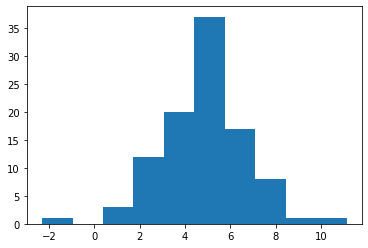

In [193]:
plt.hist(x)  #정규분포를 따르는 데이터
np.mean(x)
np.std(x)

In [194]:
x[98:100] = 100
x

array([  4.84040599,   0.48884127,   3.26386552,   5.18968561,
         4.56282571,   7.26727369,   3.05099867,   5.02379852,
         8.18715809,   5.24169998,   6.01491205,   2.43893192,
        11.13729329,   3.77135344,   6.78013868,   4.636079  ,
         4.40325973,   3.00242381,   4.66569469,   5.17153872,
         5.97775223,   5.04168713,   4.91078015,   5.08693845,
         2.67882616,   4.57527261,   4.03799096,   6.98501853,
         5.78706978,   5.5163483 ,   5.12776998,   3.49788474,
         5.56231545,   4.89375726,   4.86340584,  -2.30884095,
         3.99493798,   4.61731468,   7.20503072,   6.13841343,
         3.6620221 ,   3.96446764,   1.72488479,   5.96681439,
         4.18526736,   3.02762154,   5.03373519,   5.61612529,
         6.10302302,   5.0604313 ,   7.69913238,   4.45566658,
         6.10366401,   3.06694165,   3.29553778,   4.78365975,
         3.58751113,   2.88536998,   7.31826485,   4.11991908,
         7.12852407,   5.68245544,   4.67530151,   3.60

(array([ 3., 26., 47., 18.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

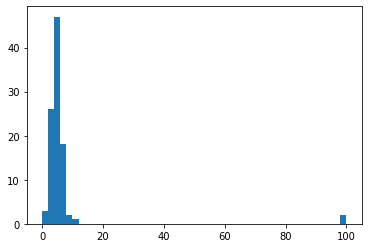

In [201]:
np.mean(x)
np.std(x)
#plt.hist(x)
plt.hist(x, bins=np.arange(0,102,2))

(array([95.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.6710194 ,  0.08984791,  0.85071522,  1.61158253,  2.37244984,
         3.13331715,  3.89418446,  4.65505177,  5.41591908,  6.17678639,
         6.9376537 ]),
 <a list of 10 Patch objects>)

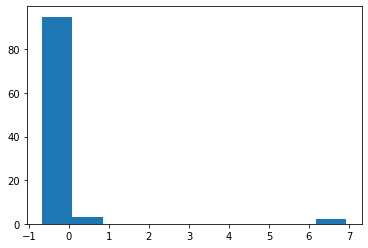

In [215]:
#type(x) -> array
# x = x.reshape(100,1)  #(100,) => (100,1)
x = x.reshape(-1,1)  #열만 지정, 자동으로 계산
x.shape
ss_x = StandardScaler().fit_transform(x)
np.mean(ss_x)
np.std(ss_x)
plt.hist(ss_x)

(array([ 1.,  0.,  3., 12., 20., 36., 17.,  8.,  0.,  1.]),
 array([-0.6710194 , -0.57102097, -0.47102253, -0.3710241 , -0.27102566,
        -0.17102723, -0.07102879,  0.02896964,  0.12896808,  0.22896651,
         0.32896495]),
 <a list of 10 Patch objects>)

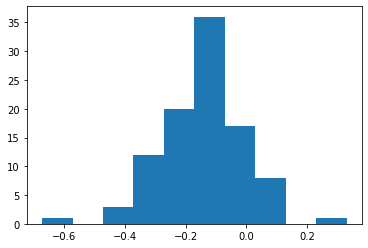

In [220]:
ss_x_z = ss_x[ss_x<5] #조건이 True인 값만 추출
plt.hist(ss_x_z)

(array([ 0.,  0.,  0.,  1.,  0.,  2.,  6., 21., 32., 23., 10.,  2.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

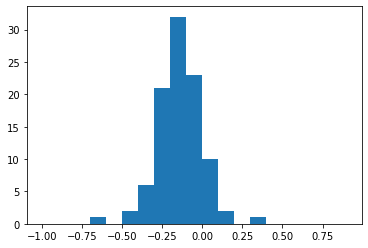

In [222]:
plt.hist(ss_x_z, bins=np.arange(-1,1,0.1))

In [228]:
#이상치 포함 데이터의 중앙값, IQR을 이용->표준화
np.median(x) #중앙값
x
q1 = np.percentile(x,25) #1사분위 수(크기 순으로 나열했을 때, 25% 지점의 수)
q3 = np.percentile(x,75) #3사분위 수
iqr = q3-q1
iqr

2.2635439125176875

(array([ 2.,  5.,  3.,  6.,  3.,  3.,  3.,  4.,  6.,  6., 10.,  2.,  7.,
         5.,  4.,  4.,  3.,  0.,  3.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

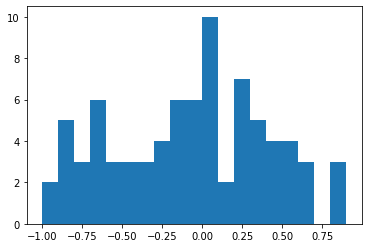

In [237]:
x_rs = RobustScaler().fit_transform(x)
x_rs
np.median(x_rs)
np.mean(x_rs)
np.std(x_rs)
# plt.hist(x_rs)

x_rs_z = x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))

In [240]:
#1

arr = np.array([[10,20,30,40],
                [50,60,70,80]])
arr

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [251]:
#2

m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])

m[1,2]
m[-1,-1]
m[1,[1,2]]
m[[1,2],2]
m[0:2,3:5]

array([[3, 4],
       [8, 9]])

In [258]:
#3

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

x1 = x[x%3==0]
print(x1)

x2 = x[x%4==1]
print(x2)

for i in x1:
    if i in x2:
        print(i)

[ 3  6  9 12 15 18]
[ 1  5  9 13 17]
9


In [259]:
#4

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [305]:
df['Age']
age = df['Age'].mean()
age
f1 = df['Age'].fillna(age)
f1

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [309]:
df['SibSp']
sibsp = max(df['SibSp'])
df2 = df['SibSp'].fillna(sibsp)
df2

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [314]:
df['Parch']
parch = min(df['Parch'])
df3 = df['Parch'].fillna(parch)
df3

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [332]:
df['Fare']
fare = df['Fare'].mean()
df4 = df['Fare'].fillna(fare)
df4

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [329]:
import scipy.stats as ss

1.0

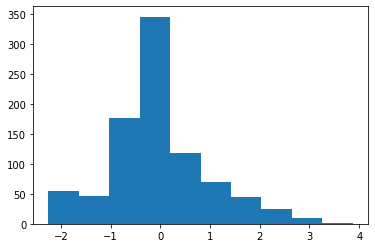

In [359]:
#Age

ss_df1 = ss.zscore(df1)
plt.hist(ss_df1)
mean(ss_df1)
std(ss_df1)

In [362]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
ss_df1.reshape(-1,1)
print(robustScaler.fit(ss_df1))
ss_df1_robustScaled = robustScaler.transform(ss_df1)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.5924806   0.63878901 -0.2846632   0.40792596  0.40792596  0.
  1.87005862 -2.13156761 -0.20770885 -1.20811541 -1.97765891  2.17787603
 -0.7463893   0.71574336 -1.20811541  1.94701297 -2.13156761  0.
  0.10010856  0.          0.40792596  0.33097161 -1.13116105 -0.1307545
 -1.66984151  0.63878901  0.         -0.82334365  0.          0.
  0.79269771  0.          0.          2.79351083 -0.1307545   0.94660642
  0.         -0.66943495 -0.900298   -1.20811541  0.79269771 -0.20770885
  0.         -2.05461326 -0.82334365  0.          0.          0.
  0.         -0.900298   -1.74679586 -0.66943495  1.48528687 -0.05380014
  2.71655648  0.         -0.66943495 -0.09227732 -1.90070456 -1.43897846
 -0.5924806   0.63878901  1.17746947 -1.97765891  0.          0.
 -0.05380014 -0.82334365 -0.97725235 -0.2846632   0.17706291 -1.0542067
 -0.66943495 -0.2846632   0.17706291 -0.36161755  0.          0.
 -2.2216042   0.02315421 -0.5924806  -0.05380014  0.         -0.1307545
 -0.97725235  0.25401726 -1.0542067   0.         -0.51552625 -0.4385719
 -0.05380014 -0.7463893   1.25442382 -0.2846632   2.25483038  0.
  3.17828259 -0.51552625  0.33097161  0.33097161 -0.1307545   0.
 -0.66943495  0.25401726  0.56183466 -0.1307545  -0.66943495  0.
  0.63878901  0.          1.33137817 -1.16963823 -0.5924806  -0.7463893
 -0.97725235 -0.66943495  3.13980541 -0.05380014 -0.4385719  -2.13156761
 -0.66943495  0.          0.21554008  0.21554008  1.87005862 -1.36202411
  0.         -0.4385719   0.          1.17746947  0.25401726 -0.7463893
  1.33137817 -0.05380014 -0.36161755 -0.51552625 -0.82334365  0.56183466
 -1.0542067  -0.4385719   0.         -0.5924806  -0.4385719  -0.82334365
 -0.900298   -0.82334365 -0.20770885 -1.59288716  0.52335749  0.94660642
  1.63919557 -0.5924806   1.98549015  0.83117489  0.          1.63919557
 -1.0542067   0.02315421  0.          0.          1.10051512  0.79269771
 -0.2846632  -0.97725235 -2.20852197 -1.59288716  0.          1.17746947
  0.         -0.1307545   2.40873908 -1.97765891 -2.20852197 -0.66943495
  2.02396733 -0.900298    0.          1.56224122  0.02315421  0.48488031
  0.          0.         -1.59288716 -2.20852197 -1.97765891  0.
  0.          1.17746947  0.79269771  0.48488031  0.17706291 -0.82334365
 -0.82334365 -2.05461326  1.10051512  2.17787603  0.          0.94660642
  0.         -0.4385719  -0.1307545   0.          0.33097161  1.21594664
 -0.900298   -2.13156761  0.17706291 -0.2846632  -1.0542067   0.79269771
 -0.4385719   0.40792596 -0.5924806   0.02315421  0.          0.10010856
 -0.20770885  0.94660642  0.17706291  0.02315421 -1.0542067  -0.20770885
  1.63919557  0.          0.63878901 -0.5924806  -0.82334365 -0.70791213
 -0.900298    0.          0.40792596 -0.05380014  2.25483038 -1.90070456
 -0.4385719   0.          1.10051512 -1.66984151 -0.82334365  0.25401726
  0.          0.         -0.05380014 -0.5924806   0.02315421  1.10051512
 -0.36161755 -0.4385719   0.56183466  1.87005862  0.         -0.05380014
  2.48569343  0.02315421  0.86965206 -0.05380014  0.          0.02315421
  0.40792596  1.56224122  0.         -2.05461326  1.71614992  0.79269771
  0.          0.48488031 -1.0542067  -0.36161755  2.17787603  0.40792596
  0.         -0.36161755  0.86965206  0.56183466  0.          2.56264778
  1.17746947  0.         -1.74679586  0.40792596  2.71655648 -0.1307545
 -1.0542067  -0.82334365  0.          0.25401726  0.02315421 -0.5924806
  0.94660642 -0.5924806  -0.2846632  -0.82334365  0.48488031 -0.4385719
 -0.4385719   0.         -0.47704907 -2.13156761  0.          1.56224122
  0.          0.         -0.82334365  0.          0.         -2.21467831
  0.         -0.97725235  0.02315421  0.02315421 -0.4385719  -0.900298
 -0.2846632  -0.1307545   1.02356077 -0.2846632  -0.4385719   1.87005862
  0.10010856  0.79269771 -0.5924806  -0.20770885  0.02315421 -0.5924806
  0.          0.48488031  2.40873908  0.48488031  0.10010856 -1.0542067
  0.          1.21594664  0.63878901 -1.0542067   0.          0.
 -0.05380014  0.86965206  1.17746947  1.17746947 -2.13156761 -0.4385719
 -0.1307545  -0.36161755  0.48488031 -0.4385719   0.79269771  0.
 -2.05461326  0.94660642 -0.51552625  0.         -1.13116105 -0.36161755
  0.         -0.1307545  -0.5924806   0.63878901  0.          0.
  0.79269771 -0.05380014  1.17746947  0.40792596  0.          0.02315421
  2.33178473  0.          0.         -0.4385719  -0.36161755 -0.900298
 -0.82334365 -0.5924806  -2.05461326  0.         -0.5924806  -0.20770885
 -0.7463893  -0.82334365  0.94660642 -2.20852197  0.17706291  0.40792596
  0.         -0.900298   -2.20852197  0.48488031  0.         -0.97725235
  0.48488031 -0.66943495 -0.1307545  -0.51552625 -0.4385719  -0.5924806
  0.10010856  1.25442382 -0.51552625 -0.1307545   0.71574336 -0.2846632
 -0.66943495 -0.1307545  -0.7463893   0.33097161  1.63919557 -2.05461326
 -0.66943495  0.          0.          0.          0.25401726  0.
  1.10051512  0.          0.33097161 -0.900298    0.02315421 -1.51593281
  0.         -0.66943495 -0.05380014 -0.1307545  -0.900298    0.
 -0.1307545  -0.82334365  0.          0.17706291 -0.1307545   0.
  0.94660642 -0.97725235  1.56224122 -1.20811541 -0.66943495 -0.4385719
  2.63960213  0.10010856  1.17746947 -0.7463893  -0.36161755 -0.1307545
  0.         -1.97765891 -1.28506976  0.33097161 -1.90070456  1.71614992
  0.48488031  0.          0.02315421  1.48528687  0.         -0.05380014
  2.71655648  0.          1.56224122  0.          1.40833252  0.33097161
  1.33137817  1.40833252  0.          0.63878901  0.          2.02396733
  0.         -2.22776055  0.          0.63878901  0.25401726 -0.51552625
 -0.5924806   0.          0.33097161 -0.05380014 -0.5924806  -2.13156761
 -1.59288716  0.          1.56224122  2.56264778 -0.36161755  0.
  0.40792596  2.17787603  0.02315421 -1.59288716  0.         -0.66943495
  1.94701297  3.17828259 -0.66943495  0.          1.87005862  0.
 -0.36161755 -0.4385719  -0.97725235 -0.66943495  0.          0.56183466
 -1.0542067  -0.900298    0.25401726  0.         -0.1307545  -0.2846632
 -0.05380014  0.          0.48488031  1.87005862 -0.4385719   1.33137817
  0.33097161  0.          0.48488031  0.17706291  0.02315421 -0.5924806
  0.          1.10051512  0.          0.83117489  1.56224122  0.
  0.71574336 -0.51552625 -2.13156761  0.         -0.97725235  0.
  0.02315421 -1.74679586  1.17746947  0.02315421  0.         -0.5924806
  0.48488031 -1.59288716 -1.43897846  0.17706291  1.56224122  2.63960213
 -0.82334365  0.          0.25401726 -1.66984151 -0.97725235 -0.20770885
  0.         -0.5924806  -0.5924806   2.48569343  1.40833252  0.
  0.71574336  0.48488031  0.          0.79269771 -0.1307545   0.
  0.         -0.4385719  -0.82334365 -0.05380014  0.          0.17706291
  2.48569343  1.79310427  0.48488031  0.         -1.0542067  -0.82334365
  0.33097161  0.71574336  0.          0.17706291 -0.36161755  0.71574336
  1.87005862  0.48488031  0.         -0.900298    1.33137817  2.33178473
 -0.5924806   0.          0.40792596  1.71614992  1.33137817  0.
  0.56183466  0.48488031  0.          1.48528687  0.          1.48528687
 -0.4385719   0.          0.          1.10051512  0.40792596  0.48488031
  0.02315421 -0.20770885 -0.5924806   0.79269771  0.71574336  0.
  0.          0.          0.40792596 -0.4385719   0.33097161 -0.2846632
 -1.97765891 -0.2846632  -0.20770885  0.94660642 -0.7463893  -0.66943495
 -0.66943495  2.40873908  2.10092168 -0.66943495 -0.2846632   0.
  3.87087174  1.63919557  0.17706291  0.         -1.59288716 -0.1307545
  0.17706291  0.10010856  0.86965206  0.         -0.7463893  -0.4385719
 -2.13156761  0.         -2.22776055  1.40833252 -0.82334365  2.02396733
  0.         -0.51552625  0.         -0.900298   -0.66943495  0.
 -0.900298   -0.4385719   0.          0.17706291 -0.51552625  2.17787603
  1.56224122  0.79269771  1.33137817  0.48488031 -0.7463893   0.17706291
 -0.36161755  0.          1.02356077  0.          0.79269771  0.10010856
  3.10132824  0.10010856  0.         -0.900298   -0.40009472 -0.900298
  1.02356077  0.48488031  0.         -0.20770885 -0.7463893  -1.20811541
  2.33178473 -0.36161755 -1.20811541 -0.82334365 -0.900298   -1.13116105
  0.10010856 -1.97765891  0.         -0.36161755  2.33178473  1.71614992
  1.10051512  0.          1.48528687  0.94660642 -0.900298    0.40792596
 -0.900298   -0.36161755 -0.2846632   0.71574336  1.17746947  0.94660642
 -0.5924806   0.         -0.4385719   0.          1.40833252 -0.05380014
  1.71614992 -0.82334365  0.63878901 -0.20770885  0.          0.25401726
 -1.82375021 -0.97725235  0.33097161  1.56224122 -0.20770885 -0.7463893
  0.02315421  0.         -0.36161755 -0.36161755 -0.05380014 -1.43897846
  0.         -0.51552625 -0.51552625 -0.09227732  1.40833252  0.40792596
  0.          0.          0.          0.48488031 -0.66943495 -0.4385719
  0.10010856  3.10132824 -1.0542067   0.02315421 -0.82334365  0.10010856
 -1.97765891 -1.82375021  0.25401726 -0.51552625  1.40833252 -2.2339169
 -0.1307545  -0.900298    0.33097161  0.25401726  0.          0.86965206
 -0.7463893   0.48488031 -1.0542067   1.63919557  0.          0.06163138
  0.          0.17706291 -0.4385719   1.40833252  2.10092168  0.
  1.87005862 -0.900298    0.         -1.90070456  0.          1.02356077
 -1.28506976 -0.97725235 -0.05380014  0.         -0.36161755 -0.36161755
 -0.900298   -1.66984151 -2.20852197  1.25442382  0.         -1.0542067
  0.          0.         -0.36161755  0.71574336  1.48528687  0.10010856
  0.02315421  0.02315421  0.33097161  0.10010856 -1.43897846 -2.25315549
 -0.20770885  0.10010856  0.71574336 -0.900298    0.71574336  0.25401726
 -0.2846632   0.71574336  0.40792596 -1.82375021  0.06163138  0.
 -0.51552625  0.10010856  1.02356077 -1.51593281  1.71614992 -0.20770885
  0.63878901 -0.20770885 -2.13156761  0.          0.         -2.20852197
  0.          2.48569343 -1.13116105 -2.2216042   0.         -0.51552625
 -0.900298    0.71574336 -0.66943495  0.          0.17706291  0.
 -0.7463893  -1.0542067   0.02315421  0.36944878 -0.97725235  0.94660642
  0.          0.40792596 -0.1307545   0.         -1.97765891  3.40914564
 -1.59288716 -1.0542067   1.10051512 -0.900298    1.17746947  1.63919557
 -0.4385719   0.          0.86965206 -0.66943495  1.40833252  0.
 -0.4385719   0.94660642 -0.20770885  0.10010856  0.         -1.97765891
 -0.2846632   1.33137817  0.25401726  1.33137817 -0.1307545  -1.13116105
 -0.7463893  -0.82334365  0.          2.02396733 -0.36161755  0.25401726
 -0.5924806  -0.1307545  -0.36161755  0.71574336 -0.20770885 -0.82334365
  0.         -0.2846632   0.17706291].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [356]:
np.median(ss_df1) 

q1 = np.percentile(ss_df1,25) 
q3 = np.percentile(ss_df1,75)
iqr = q3-q1
iqr

1.0004065596243987

-0.47454519624983954

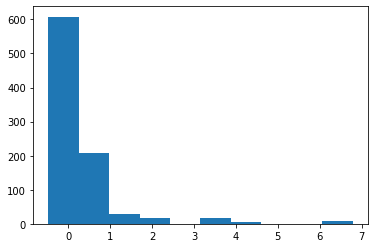

In [360]:
#Sib Sp

ss_df2 = ss.zscore(df2)
plt.hist(ss_df2)
mean(ss_df2)
median(ss_df2)

0.9999999999999999

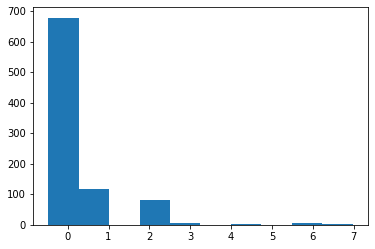

In [346]:
#Parch

ss_df3 = ss.zscore(df3)
plt.hist(ss_df3)
mean(ss_df3)
std(ss_df3)

1.0

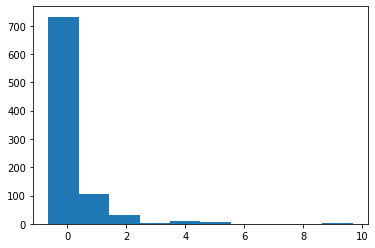

In [349]:
#Fare

ss_df4 = ss.zscore(df4)
plt.hist(ss_df4)
mean(ss_df4)
std(ss_df4)